## 七月在线机器学习实训营三期第三周(Pandas数据处理)考试
#### 考试说明:
- 起止时间：请同学在2018年2月9日至2月11日期间完成，最晚提交时间本周日（2月11日24时之前）结束，<b>逾期不接受补考,该考试分数计入平时成绩</b>
- 考试方式：请同学<font color=red><b>拷贝</b></font>该试卷至自己姓名的目录后，将文件更名为同学姓名拼音-exam3后，进行作答。例如wangwei-exam3
- 提交格式：请同学新建自己姓名全拼的文件夹，将该试卷，zip文件等相关考试文件，放置此目录下。将该目录<b>移动</b>至/0.Teacher/Exam/3/目录下
- 注意事项：为确保同学们真正了解自身对本周课程的掌握程度，<font color=red><b>请勿翻阅，移动，更改</b></font>其它同学试卷。如发现按0分处理
- 请同学在下方同学姓名处填写自己的姓名，批改人和最终得分不用填写

- 同学姓名:<u>___李如意____</u>  
- 批改人： David
- 最终得分:100

<center><h1>####答卷开始####</h1></center>
<hr>

### Pandas实战题(共七个步骤，每个步骤要求及分数均已标明。总分100分)

1.请将文件student-info.csv中的内容读入pandas DataFrame "df_info"，注意该文件的分隔符是分号，并展示前五行（7.5分）   
请将文件student-score.csv中的内容读入pandas DataFrame "df_score"，注意该文件的分隔符是分号，并展示前五行（7.5分）

In [1]:
import pandas as pd
import numpy as np

df_info = pd.read_csv('../data/student-info.csv',sep=';',index_col=0)
df_info.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
ID,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4


In [2]:
df_score = pd.read_csv('../data/student-score.csv',sep=';',index_col=0)
df_score.head()

,G1,G2,G3
ID,,,
0,5,6,6
1,5,5,6
2,7,8,10
3,15,14,15
4,6,10,10


2.把两个DataFrame "df_info" 和 "df_score" 按照学生ID对齐拼接起来，结果存在一个新DataFrame "df" 中 (10分）

***
好像没指定是什么类型的merge，最好指定下，加深去merge使用的理解

In [3]:
df = df_info.join(df_score)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
ID,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


3.把"df"所有的列展示出来(5分)

In [6]:
df.T.index

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

4.统计男生的平均分和女生的平均分(G1, G2, G3)，使用groupby和aggregate来操作(10分)

In [7]:
df_sex = df.groupby('sex')
df_sex.agg({'G1':np.mean, 'G2':np.mean, 'G3':np.mean})

,G3,G1,G2
sex,,,
F,9.966346,10.620192,10.389423
M,10.914439,11.229947,11.074866


5.统计不同年龄的学生(G1, G2, G3)的平均分，并作出柱状图展示（10分）

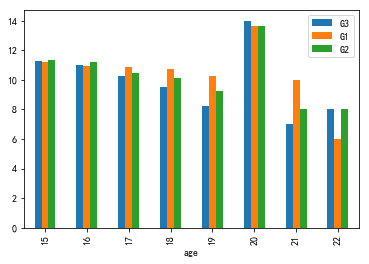

In [8]:
df_age = df.groupby('age')
df_age_average = df_age.agg({'G1':np.mean, 'G2':np.mean, 'G3':np.mean})

%matplotlib inline
df_age_average.plot.bar()

6.统计不同学校(school一列)的学生的平均分，并作柱状图展示，要求同一科目的两个学校成绩贴在一起展示(10分）

               G3         G1         G2
school                                 
GP      10.489971  10.939828  10.782235
MS       9.847826  10.673913  10.195652


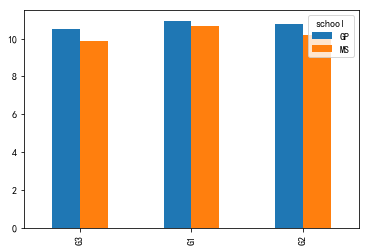

In [9]:
df_school = df.groupby('school')
df_school_average = df_school.agg({'G1':np.mean, 'G2':np.mean, 'G3':np.mean})
print(df_school_average)

%matplotlib inline
df_school_average.T.plot.bar()

7.统计一下每个学校三个科目总分的前十名，然后把前十名的同学所有信息输出(40分)

***
Done!   
处理得有些复杂，再想想更简便的办法

In [10]:
df_1 = df
df_1['total_score'] = df_1['G1'] + df_1['G2'] + df_1['G3']   #新加一列total_score，算出三科总分

df_1 = df_1.set_index('school')    #将表的index设置为school

df_1_gp = df_1.loc['GP']           #名为GP的学校拉出来作为一个新的DataFrame
df_1_gp_10 = df_1_gp.sort_values(by='total_score').tail(10)   #按照total_score排序，取前十名，作为一个新的DataFrame

df_1_ms = df_1.loc['MS']           #名为MS的学校拉出来作为一个新的DataFrame
df_1_ms_10 = df_1_ms.sort_values(by='total_score').tail(10)   #按照total_score排序，取前十名，作为一个新的DataFrame

df_1_all_10 = pd.concat([df_1_gp_10, df_1_ms_10])    #两个DataFrame合并
df_1_all_10

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,total_score
school,,,,,,,,,,,,,,,,,,,,,
GP,M,20,U,GT3,A,3,2,services,other,course,...,5,3,1,1,5,0,17,18,18,53
GP,M,16,U,GT3,T,2,1,other,other,course,...,3,3,1,1,4,6,18,18,18,54
GP,F,17,U,GT3,T,4,4,services,teacher,home,...,2,4,2,3,2,24,18,18,18,54
GP,M,16,R,GT3,T,4,4,teacher,teacher,course,...,5,5,2,5,4,8,18,18,18,54
GP,F,17,R,LE3,T,3,1,services,other,reputation,...,1,2,1,1,3,6,18,18,18,54
GP,M,15,U,GT3,T,4,4,services,teacher,course,...,3,3,1,1,5,2,19,18,18,55
GP,F,18,U,GT3,T,2,2,at_home,at_home,other,...,3,3,1,2,2,5,18,18,19,55
GP,M,15,U,LE3,A,4,4,teacher,teacher,course,...,5,3,1,1,4,6,18,19,19,56
GP,M,15,U,LE3,T,4,2,teacher,other,course,...,5,2,1,1,3,10,18,19,19,56


### 本阶段课程意见反馈题(10分送分项，非必答)
- 请同学围绕以下两点进行回答：
- 自身总结：请您对您自己在本周课程的学习，收获，技能掌握等方面进行一次总结 ，也包括有哪些方面存在哪些不足，欠缺，困惑。作为将来回顾学习路径时的依据。



In [ ]:
收获：知道了pandas可以怎么处理表格，有一些思路
不足：对很多方法不熟悉，需要随时查阅，需要多多联系~

- 课程反馈：请就知识点，进度，难易度，教学方式，考试方式及难易度等方面向我们反馈，督促我们进行更有效的改进。

In [ ]:
这周的课挺好的， pandas这个主要还是自己多联系，师父领进门修行在个人~

<hr>
<center><h1>####答卷结束####</h1></center>